In [1]:
import pandas as pd

In [14]:
accessibility = pd.read_csv('data\\processed\\accessibility_edges.csv')

In [15]:
population = pd.read_csv('data\\processed\\PopulationData.csv')

In [16]:
population.head()

,OBJECTID,SA2_CODE_2021,SA2_5DIG21,SA2_CODE_2016,SA2_5DIG16,SA2_NAME_2021,AREA_ALBERS_SQKM,ASGS_LOCI_URI_2021,ERP_P_202021,ERP_P_202021 (%),...,ADFS_42021,ADFS_52021,SHAPE_Length,SHAPE_Area,SA2_5DIG21.1,ERP_P_202021 (%).1,ERP_M_202021 (%).1,ERP_F_202021 (%).1,SA2_CODE_2016.1,SA2_5DIG16.1
0,1,101021007,11007,101021007,11007,Braidwood,3418.3525,https://linked.data.gov.au/dataset/asgsed3/SA2...,4330.0,0.016856,...,0.5,5.0,3.913695,0.339397,11007,0.016856,0.017632,0.016092,101021007,11007
1,2,101021008,11008,101021008,11008,Karabar,6.9825,https://linked.data.gov.au/dataset/asgsed3/SA2...,8546.0,0.033268,...,1.6,3.7,0.138642,0.000693,11008,0.033268,0.033915,0.032631,101021008,11008
2,3,101021009,11009,101021009,11009,Queanbeyan,4.7620,https://linked.data.gov.au/dataset/asgsed3/SA2...,11370.0,0.044262,...,1.6,3.7,0.107150,0.000472,11009,0.044262,0.045398,0.043143,101021009,11009
3,4,101021010,11010,101021010,11010,Queanbeyan - East,13.0032,https://linked.data.gov.au/dataset/asgsed3/SA2...,5093.0,0.019826,...,3.5,4.6,0.189549,0.001290,11010,0.019826,0.020950,0.018719,101021010,11010
4,5,101021012,11012,101021012,11012,Queanbeyan West - Jerrabomberra,13.6748,https://linked.data.gov.au/dataset/asgsed3/SA2...,12743.0,0.049607,...,5.8,5.9,0.193368,0.001356,11012,0.049607,0.050096,0.049125,101021012,11012


In [30]:
accessibility.groupby('from').sum()['accessible']

from
11008    9
11009    9
11010    9
11011    1
11012    9
        ..
91002    0
91003    0
91004    0
99499    0
99799    0
Name: accessible, Length: 2309, dtype: int64

In [21]:
accessibility_per_sa = accessibility.groupby('from').sum()['accessible'].to_list()

In [31]:
accessibility.groupby('from').sum().loc[accessibility.groupby('from').sum()['accessible']==100]

,to,accessible,further_than_2h
from,,,
21132,511566,100,850
21134,511566,100,855
21146,511566,100,855
21147,511566,100,855
21150,511566,100,855
21165,511566,100,855
21195,511566,100,856


In [29]:
from collections import Counter
counter_obj = Counter(accessibility_per_sa)
counter_obj

Counter({9: 119,
         1: 276,
         0: 270,
         2: 197,
         3: 106,
         6: 87,
         5: 106,
         7: 31,
         8: 63,
         4: 58,
         10: 25,
         11: 13,
         60: 6,
         54: 11,
         41: 3,
         57: 8,
         14: 19,
         12: 39,
         27: 21,
         44: 9,
         37: 36,
         51: 4,
         35: 37,
         24: 15,
         31: 33,
         34: 30,
         22: 8,
         62: 5,
         63: 2,
         70: 6,
         61: 5,
         56: 5,
         66: 5,
         78: 14,
         80: 6,
         71: 6,
         68: 6,
         77: 4,
         75: 5,
         73: 8,
         74: 5,
         55: 9,
         53: 3,
         59: 5,
         50: 9,
         58: 3,
         67: 8,
         84: 4,
         69: 8,
         82: 5,
         81: 11,
         76: 12,
         65: 9,
         72: 8,
         85: 7,
         91: 7,
         86: 7,
         87: 7,
         83: 7,
         92: 2,
         79: 6,
    

In [35]:
accessibility_per_sa_df = accessibility.groupby('from').sum()[['accessible']].reset_index(drop=False)
accessibility_per_sa_df

,from,accessible
0,11008,9
1,11009,9
2,11010,9
3,11011,1
4,11012,9
...,...,...
2304,91002,0
2305,91003,0
2306,91004,0
2307,99499,0


In [41]:
population['SA2_5DIG16'] = population['SA2_5DIG16'].astype(str)
accessibility_per_sa_df['from'] = accessibility_per_sa_df['from'].astype(str)
new_df = pd.merge(accessibility_per_sa_df, population, how='left', left_on='from', right_on='SA2_5DIG16')

In [43]:
list(new_df.columns)

['from',
 'accessible',
 'OBJECTID',
 'SA2_CODE_2021',
 'SA2_5DIG21',
 'SA2_CODE_2016',
 'SA2_5DIG16',
 'SA2_NAME_2021',
 'AREA_ALBERS_SQKM',
 'ASGS_LOCI_URI_2021',
 'ERP_P_202021',
 'ERP_P_202021 (%)',
 'ERP_212021',
 'ERP_M_202021',
 'ERP_M_202021 (%)',
 'ERP_F_202021',
 'ERP_F_202021 (%)',
 'ERP_192021',
 'ERP_222021',
 'ERP_232021',
 'ERP_182021',
 'ERP_172021',
 'ERP_M_22021',
 'ERP_M_32021',
 'ERP_M_42021',
 'ERP_M_52021',
 'ERP_M_62021',
 'ERP_M_72021',
 'ERP_M_82021',
 'ERP_M_92021',
 'ERP_M_102021',
 'ERP_M_112021',
 'ERP_M_122021',
 'ERP_M_132021',
 'ERP_M_142021',
 'ERP_M_152021',
 'ERP_M_162021',
 'ERP_M_172021',
 'ERP_M_182021',
 'ERP_M_192021',
 'ERP_M_212021',
 'ERP_M_222021',
 'ERP_M_232021',
 'ERP_M_242021',
 'ERP_M_252021',
 'ERP_M_262021',
 'ERP_M_272021',
 'ERP_M_282021',
 'ERP_M_292021',
 'ERP_M_302021',
 'ERP_M_312021',
 'ERP_M_322021',
 'ERP_M_332021',
 'ERP_M_342021',
 'ERP_M_352021',
 'ERP_M_362021',
 'ERP_M_372021',
 'ERP_M_382021',
 'ERP_F_22021',
 'ERP_F_320

<AxesSubplot:xlabel='ERP_P_202021', ylabel='accessible'>

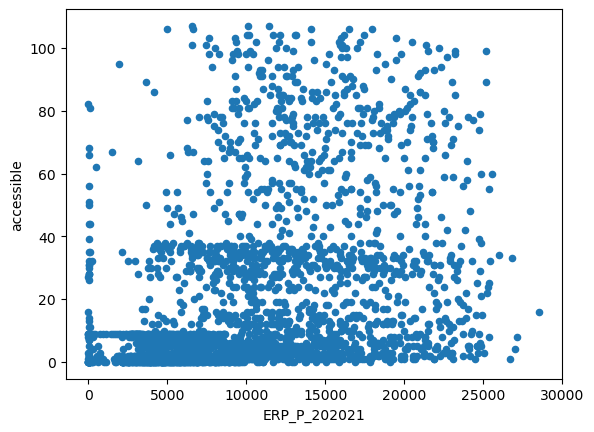

In [44]:
new_df.plot.scatter('ERP_P_202021', 'accessible')

<AxesSubplot:xlabel='ERP_P_202021', ylabel='accessible'>

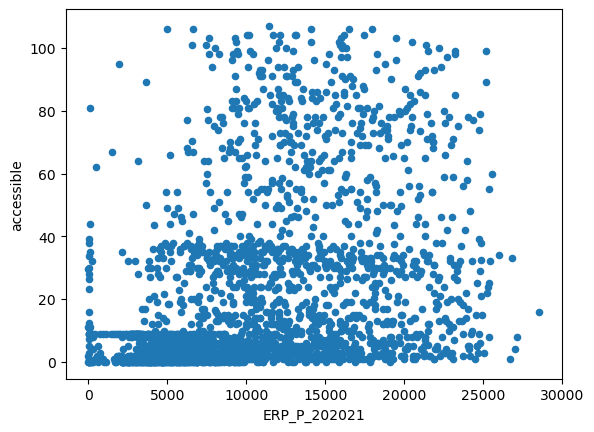

In [50]:
new_new_df = new_df.groupby('ERP_P_202021').mean()[['accessible']].reset_index(drop=False)
new_new_df.plot.scatter('ERP_P_202021', 'accessible')